## Task – 1: Data Preprocessing

### Importing Relevant Packages

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [4]:
raw_sales_data = pd.read_csv("DS3_C1_S2_Store_Item_Sales_Data_Challenge.csv") 
df_comp=raw_sales_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [5]:
df_comp.shape

(913000, 3)

## Task – 2: Data Decomposition


### Decomposing the Data to Visualize the Different Components of the Data

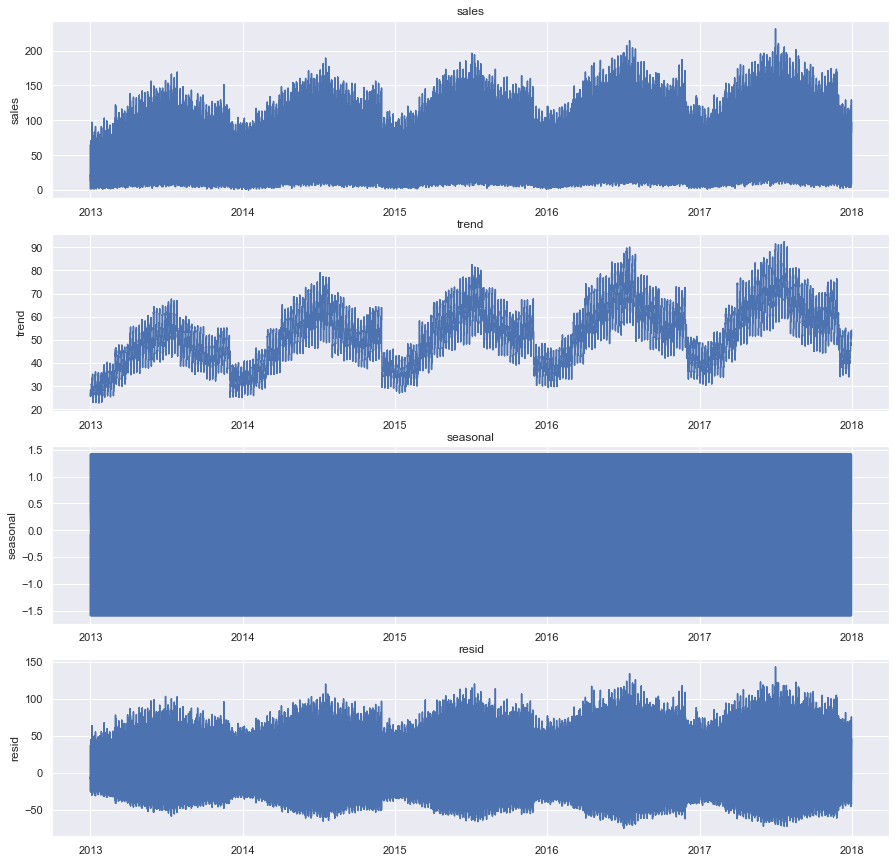

In [16]:
df_comp.sort_index(inplace=True)
decomposition = seasonal_decompose(df_comp['sales'], model='additive',period=365)

dt=decomposition.trend
ds=decomposition.seasonal
dr=decomposition.resid

a= [df_comp['sales'],dt,ds,dr]

# Trend
fig , axes =plt.subplots(4,1, figsize=(15,15))
for i ,ax in zip(a,axes.flatten()):
    ax.plot(i)
    ax.set_ylabel(i.name)
    ax.set_title(i.name)

# Decomposing the Data

In [9]:
df=df_comp['sales']
df.head()

date
2013-01-01    13
2013-01-01    26
2013-01-01    27
2013-01-01    54
2013-01-01    35
Name: sales, dtype: int64

In [10]:
df_monthly = df.resample('M').mean()
df_monthly.head()

date
2013-01-31    29.348645
2013-02-28    32.815500
2013-03-31    39.831097
2013-04-30    45.484933
2013-05-31    49.241419
Freq: M, Name: sales, dtype: float64

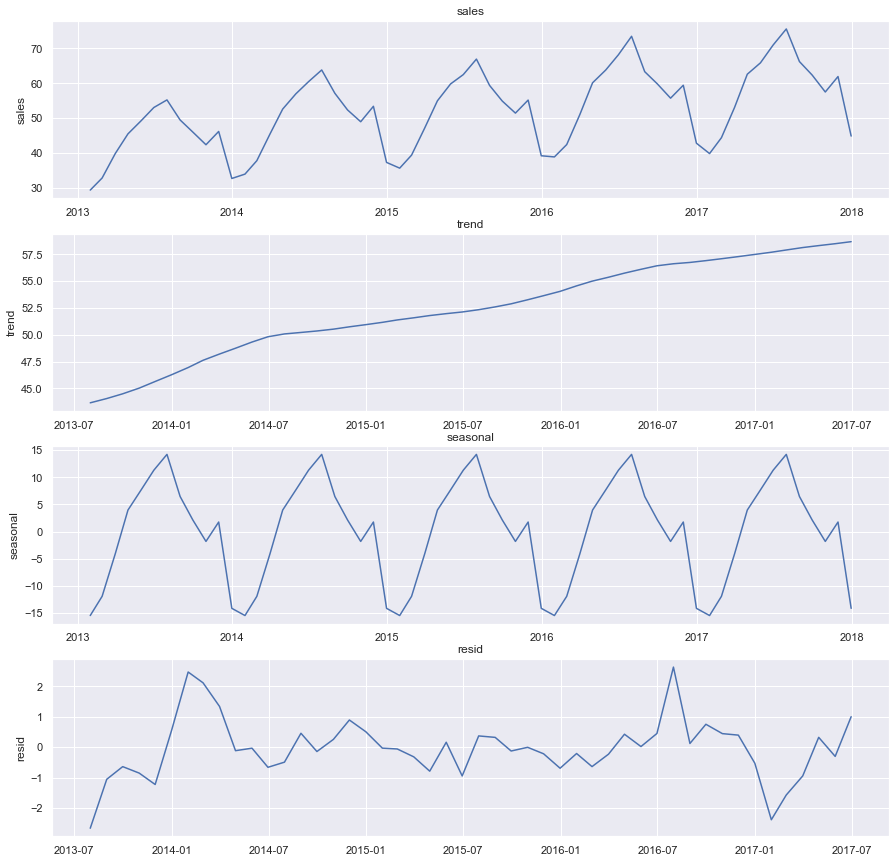

In [13]:
df_monthly.sort_index(inplace=True)
decomposition = seasonal_decompose(df_monthly, model='additive')

dt=decomposition.trend
ds=decomposition.seasonal
dr=decomposition.resid

a= [df_monthly,dt,ds,dr]

# Trend
fig , axes =plt.subplots(4,1, figsize=(15,15))
for i ,ax in zip(a,axes.flatten()):
    ax.plot(i)
    ax.set_ylabel(i.name)
    ax.set_title(i.name)

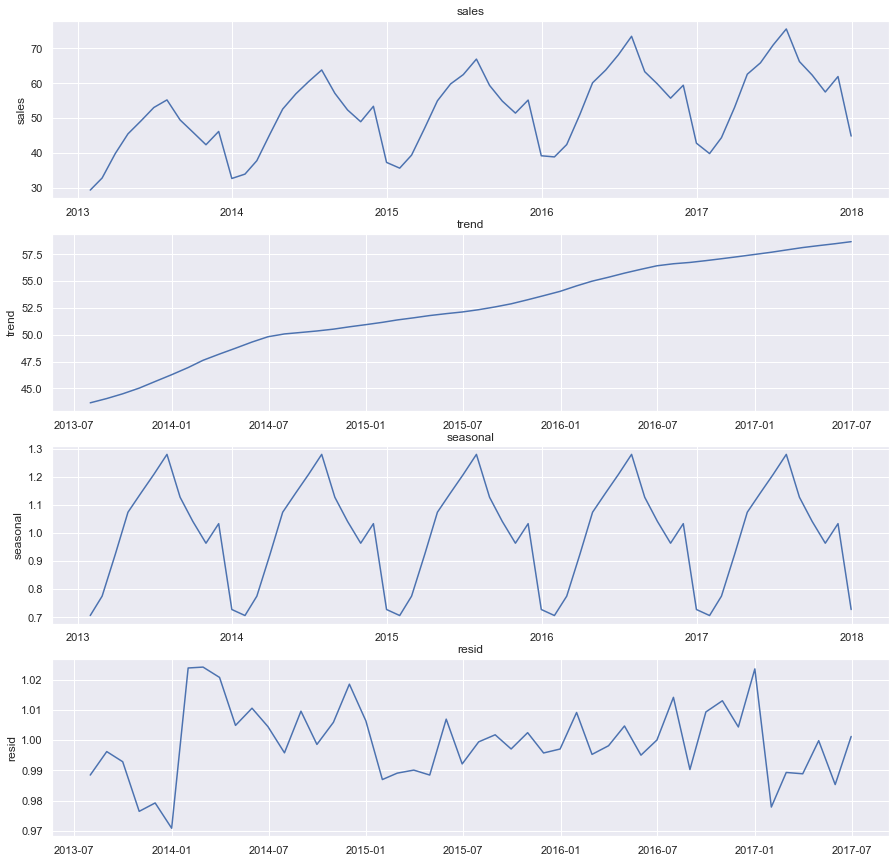

In [14]:
df_monthly.sort_index(inplace=True)
decomposition= seasonal_decompose(df_monthly, model='multiplicative')


dt=decomposition.trend
ds=decomposition.seasonal
dr=decomposition.resid

a= [df_monthly,dt,ds,dr]

# Trend
fig , axes =plt.subplots(4,1, figsize=(15,15))
for i ,ax in zip(a,axes.flatten()):
    ax.plot(i)
    ax.set_ylabel(i.name)
    ax.set_title(i.name)

In [15]:
df_monthly.shape

(60,)

## Task – 3: Stationarity Check


### Checking Stationarity

In [22]:
from statsmodels.tsa.stattools import adfuller
# dickey-fuller test for stationarity

pvalue = adfuller(df_monthly)[1]

if(pvalue>0.05):
    print('p-value={}. Data is not stationary'.format(pvalue))
else:
    print('p-value={}. Data is stationary'.format(pvalue))
        
    

p-value=3.692387626163281e-06. Data is stationary


## Task – 4: Data Smoothing


#### Applying Simple Exponential Smoothing Technique

In [23]:
# Simple Exponent - when there is no trend/seasonality
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [24]:
# create forecast for different values of alpha. Plot and understand the charts

# dictionary to store the forecast for each alpha
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]
data=df_monthly

for a in alphas:
    model, df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast

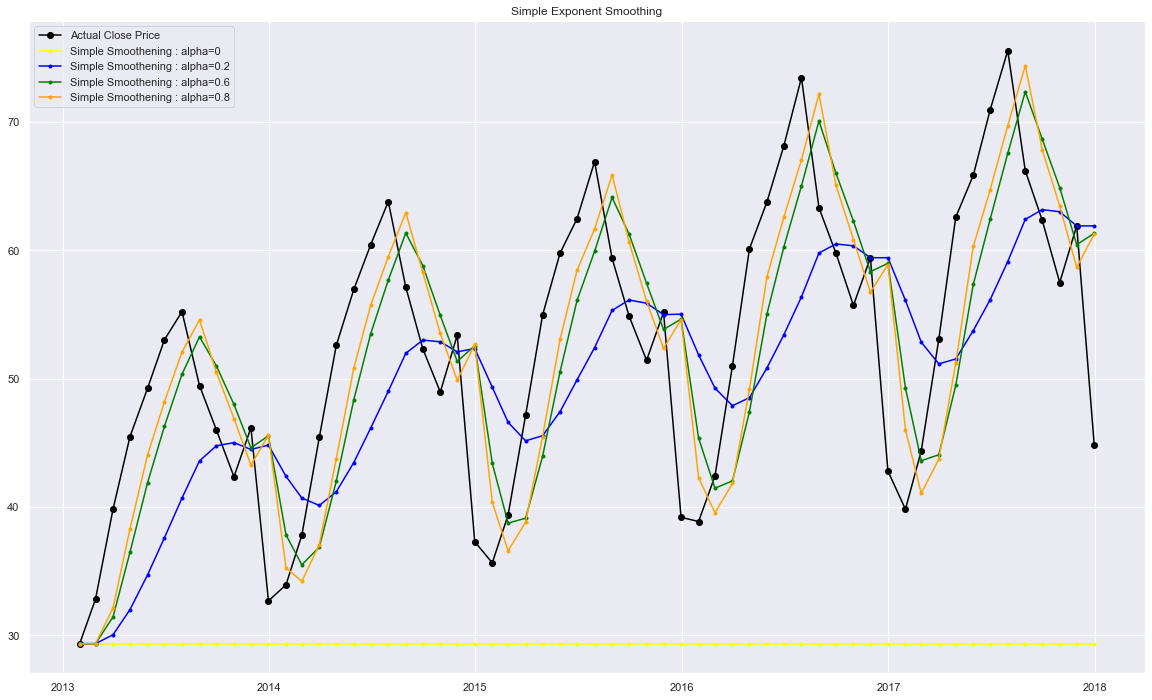

In [25]:
colors = ['yellow','blue','green','orange']


# plot the actual and forecast data
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(df_monthly, marker='o', color='black',label='Actual sales Price')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

#### Applying Double Exponential Smoothing Technique

In [26]:
# Double Exponent - when there is a trend, no seasonality (Holts' method) 
# parameters: alpha, beta

model = ExponentialSmoothing(df_monthly,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

# forecast with double exponent smoothing
f_dexp = model.fittedvalues
print(f_dexp)

date
2013-01-31    42.418425
2013-02-28    40.777403
2013-03-31    39.361765
2013-04-30    39.679308
2013-05-31    41.644672
2013-06-30    44.727935
2013-07-31    48.785408
2013-08-31    53.111118
2013-09-30    55.056955
2013-10-31    55.012378
2013-11-30    52.984855
2013-12-31    51.445120
2014-01-31    45.638877
2014-02-28    40.073524
2014-03-31    36.165182
2014-04-30    35.494808
2014-05-31    38.099553
2014-06-30    42.942482
2014-07-31    49.267456
2014-08-31    56.451592
2014-09-30    60.932890
2014-10-31    62.700074
2014-11-30    62.063552
2014-12-31    61.571601
2015-01-31    55.531798
2015-02-28    48.381893
2015-03-31    42.508515
2015-04-30    39.830443
2015-05-31    40.762655
2015-06-30    44.379304
2015-07-31    49.618348
2015-08-31    56.429703
2015-09-30    60.664868
2015-10-31    62.577012
2015-11-30    62.301969
2015-12-31    62.117502
2016-01-31    56.482370
2016-02-29    50.146498
2016-03-31    45.012992
2016-04-30    43.230098
2016-05-31    45.314856
2016-06-30 

Text(0.5, 1.0, 'Double Exponent Smoothing')

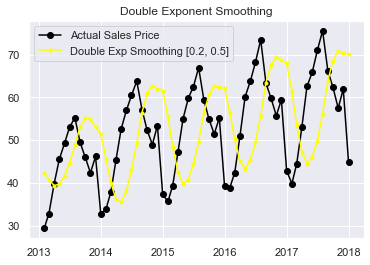

In [27]:
# plot the actual and smooth data
plt.plot(df_monthly,marker='o',color='black',label='Actual Sales Price')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

#### Applying Triple Exponential Smoothing Technique

In [28]:
# build model
model = ExponentialSmoothing(df_monthly,trend='add',seasonal='add',seasonal_periods=12).fit()

Text(0.5, 1.0, 'Triple Exponent Smoothing')

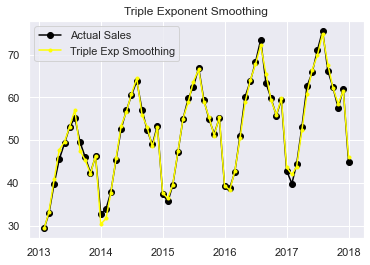

In [29]:
# plot the actual and triple smoothing values
plt.plot(df_monthly, marker='o',color='black',label='Actual Sales')
plt.plot(model.fittedvalues,marker='.',color='yellow',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

### Forecasting Data using Triple Exponential Smoothing

In [30]:
# forecast
f_dexp = model.fittedvalues
print(f_dexp)

date
2013-01-31    29.324470
2013-02-28    33.179478
2013-03-31    40.785007
2013-04-30    47.732542
2013-05-31    49.587858
2013-06-30    53.158305
2013-07-31    57.019718
2013-08-31    47.429449
2013-09-30    45.320273
2013-10-31    42.076597
2013-11-30    46.368637
2013-12-31    30.334291
2014-01-31    31.648318
2014-02-28    37.637066
2014-03-31    45.734005
2014-04-30    53.302829
2014-05-31    56.609826
2014-06-30    60.837159
2014-07-31    64.450953
2014-08-31    55.950202
2014-09-30    53.035524
2014-10-31    48.502021
2014-11-30    52.958484
2014-12-31    37.508459
2015-01-31    36.403023
2015-02-28    39.521179
2015-03-31    47.336658
2015-04-30    55.015560
2015-05-31    58.942705
2015-06-30    63.648677
2015-07-31    66.518525
2015-08-31    59.009243
2015-09-30    55.327190
2015-10-31    51.034715
2015-11-30    55.437215
2015-12-31    39.338310
2016-01-31    38.303544
2016-02-29    42.667251
2016-03-31    50.374229
2016-04-30    58.834959
2016-05-31    64.031824
2016-06-30 